In [3]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/cse440dataset.csv')

# Display basic information about the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11006 entries, 0 to 11005
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tag         11006 non-null  object
 1   Annotaions  11006 non-null  int64 
 2   Comments    11003 non-null  object
 3   ReactCount  7883 non-null   object
 4   ReplyCount  3133 non-null   object
dtypes: int64(1), object(4)
memory usage: 430.0+ KB
None
        Tag  Annotaions                                           Comments  \
0  Negative           8  এনার সাথে ভালো ব্যবহার করুন। গালাগালি করবেননা।...   
1  Negative           8  সানি লিওন কোন এক মুভির সুটিং করার জন্য বিমানে ...   
2  Negative           8  কে তুমি বৎস ধরিয়া মৎস বেচিয়া গঞ্জে অকুল কুঞ্...   
3  Negative           8       নেইমারের প্যান্ট কেনার জন্য টাকা তোলা হচ্ছে!   
4  Negative           8   ব্রা ফ্যানদের অনুরোধ করছি লজ্জা থাকলে বাহিরে ...   

  ReactCount  ReplyCount  
0        469  15 replies  
1        297  54 replies  
2    

<ipython-input-4-abccf5b29552>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tag', data=data, palette='viridis')


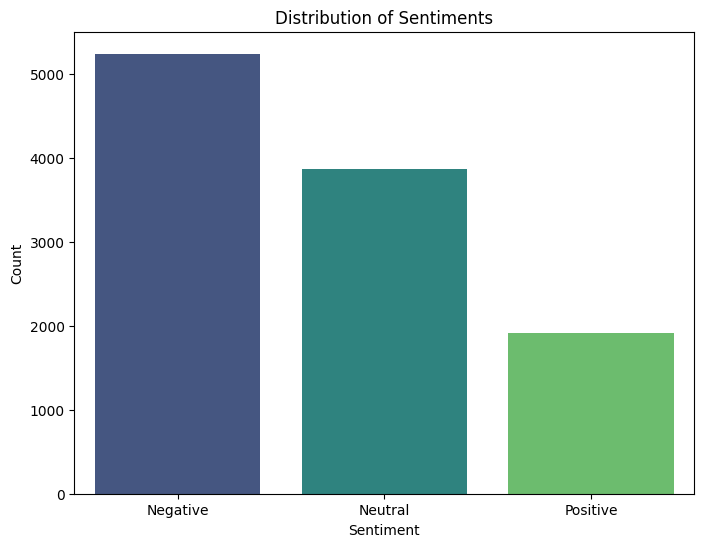

In [4]:
# Count the sentiment classes

plt.figure(figsize=(8, 6))
sns.countplot(x='Tag', data=data, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [6]:
# Oversample minority class using augmentation (synthetic duplication or SMOTE)
from sklearn.utils import resample

# Separate majority and minority classes
majority = data[data['Tag'] == 'Positive']  # Example: adjust as per your data
minority = data[data['Tag'] == 'Negative']

# Oversample minority
minority_upsampled = resample(minority,
                              replace=True,  # sample with replacement
                              n_samples=len(majority),  # match majority count
                              random_state=42)

# Combine majority and upsampled minority
balanced_data = pd.concat([majority, minority_upsampled])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42)



<ipython-input-7-b2d8b855e433>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tag', data=balanced_data, palette='viridis')


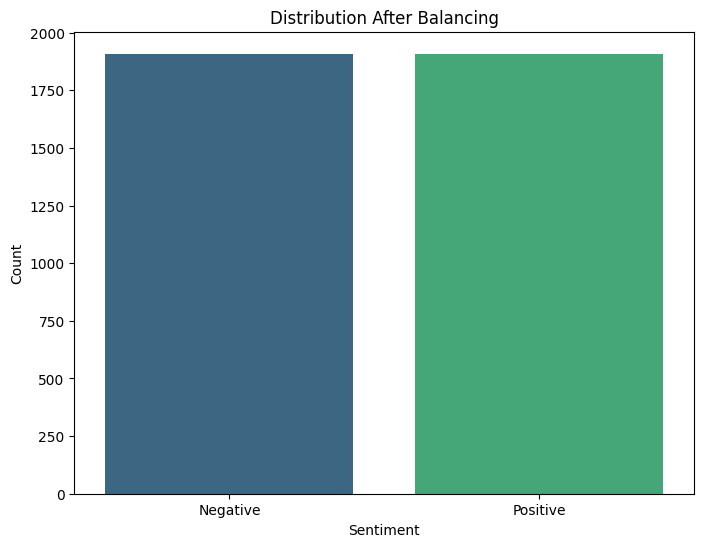

In [7]:
# Visualize the balanced dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Tag', data=balanced_data, palette='viridis')
plt.title('Distribution After Balancing')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()